In [3]:
import torch
from torch import multiprocessing
import numpy as np

import sys
sys.path.append('/home/ksh-server/workspace/ICUFN')
from my_clustering.my_vmas.scenarios.navigation_random import Scenario

In [4]:
import os
print(os.getcwd())

/home/ksh-server/workspace/ICUFN/my_clustering/my_vmas/pathfinding/pathfinding_test


In [5]:
is_fork = multiprocessing.get_start_method() == "fork"
device = (
    torch.device(0)
    if torch.cuda.is_available() and not is_fork
    else torch.device("cpu")
)
vmas_device = device

env = Scenario()
world = env.make_world(
        device=device,
        n_agents=4,
        batch_dim=1
    )


In [6]:
env.reset_world_at()

In [7]:
agents = env.world.agents
for agent in agents:
    print(agent, agent.state.pos)

<vmas.simulator.core.Agent object at 0x759cc47337f0> tensor([[0.8516, 1.5490]])
<vmas.simulator.core.Agent object at 0x759cc4733d90> tensor([[-1.6303, -0.2429]])
<vmas.simulator.core.Agent object at 0x759cc4733040> tensor([[1.2448, 0.0110]])
<vmas.simulator.core.Agent object at 0x759cc4733bb0> tensor([[-1.1566, -0.7156]])


In [8]:
targets = env.targets
for target in targets:
    print(target, target.state.pos,  target.cost)

<vmas.simulator.core.Landmark object at 0x759cc4732ce0> tensor([[ 0.0904, -0.6836]]) tensor(10)
<vmas.simulator.core.Landmark object at 0x759cc4733c10> tensor([[0.3144, 0.7754]]) tensor(10)
<vmas.simulator.core.Landmark object at 0x759cc4733940> tensor([[1.7260, 0.3768]]) tensor(10)
<vmas.simulator.core.Landmark object at 0x759e00219b70> tensor([[0.5924, 0.2774]]) tensor(20)
<vmas.simulator.core.Landmark object at 0x759e003a6f80> tensor([[-1.9447, -0.7344]]) tensor(20)
<vmas.simulator.core.Landmark object at 0x759e002420b0> tensor([[-0.7096, -0.6703]]) tensor(20)
<vmas.simulator.core.Landmark object at 0x759e00242530> tensor([[-1.9764,  1.7646]]) tensor(30)
<vmas.simulator.core.Landmark object at 0x759e00207df0> tensor([[-0.1936,  0.8536]]) tensor(30)
<vmas.simulator.core.Landmark object at 0x759e0044b6d0> tensor([[-0.8499, -1.4117]]) tensor(30)
<vmas.simulator.core.Landmark object at 0x759cc4750160> tensor([[ 0.4067, -1.2494]]) tensor(40)
<vmas.simulator.core.Landmark object at 0x759c

In [9]:
finished_position = env.finished_pos
for pos in finished_position:
    print(pos)

[tensor([[0.2000, 0.2000]])]
tensor([[ 0.2000, -0.2000]])
tensor([[-0.2000, -0.2000]])
tensor([[-0.2000,  0.2000]])


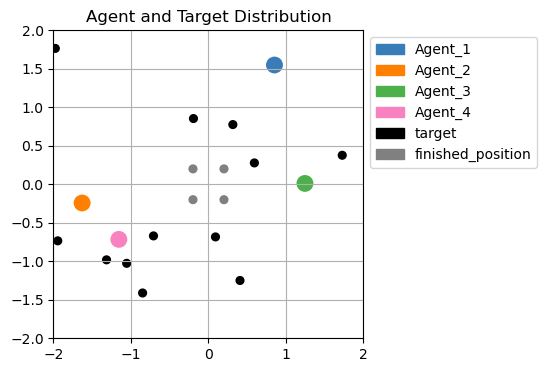

In [10]:
import matplotlib.pyplot as plt

map_size = 2

# 플롯 생성
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(-map_size, map_size)
ax.set_ylim(-map_size, map_size)
ax.set_title("Agent and Target Distribution")

# 에이전트 플로팅 (파란색 원)
for i, agent in enumerate(agents):
    x, y = agent.state.pos.squeeze().tolist()
    ax.add_patch(plt.Circle((x, y), agent.shape.radius, color=agent.color, alpha=1, label=f"Agent_{i+1}"))

for target in targets:
    x, y = target.state.pos.squeeze().tolist()
    label = "target" if targets[0] == target else None
    ax.add_patch(plt.Circle((x, y), target.shape.radius, color="black", alpha=1, label=label))
    
for pos in finished_position:
    x, y = pos[0].squeeze().tolist()
    label = 'finished_position' if finished_position[0] == pos else None
    ax.add_patch(plt.Circle((x, y), targets[0].shape.radius, color='gray', alpha=1, label=label))

# 범례 및 표시
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [11]:
agents_pos = []
for agent in agents:
    x, y = agent.state.pos.squeeze().tolist()
    agents_pos.append([x, y])
agents_pos = np.array(agents_pos)
print(agents_pos)

[[ 0.85159945  1.54902363]
 [-1.63029504 -0.24293351]
 [ 1.24479914  0.01103997]
 [-1.15662408 -0.71558046]]


In [12]:
targets_pos = []
targets_cost = []
for target in targets:
    x, y = target.state.pos.squeeze().tolist()
    targets_pos.append([x, y])
    cost = target.cost.item()
    targets_cost.append(cost)
targets_pos = np.array(targets_pos)
targets_cost = np.array(targets_cost)
print(targets_pos)
print(targets_cost)

[[ 0.09037948 -0.6835835 ]
 [ 0.31437039  0.77540445]
 [ 1.72603631  0.37675238]
 [ 0.59242654  0.27736139]
 [-1.94471192 -0.73441505]
 [-0.70958924 -0.67034698]
 [-1.97643018  1.76459479]
 [-0.19364309  0.85364294]
 [-0.84994507 -1.41165113]
 [ 0.40671682 -1.24944329]
 [-1.31547451 -0.9812808 ]
 [-1.05513573 -1.02642632]]
[10 10 10 20 20 20 30 30 30 40 40 40]


In [13]:
finished_pos = []
for pos in finished_position:
    x, y = pos[0].squeeze().tolist()
    finished_pos.append([x, y])
finished_pos = np.array(finished_pos)
print(finished_pos)

[[ 0.2  0.2]
 [ 0.2 -0.2]
 [-0.2 -0.2]
 [-0.2  0.2]]


In [14]:
# 클러스터링을 할 준비 완!!

In [17]:
from sklearn.cluster import KMeans

In [21]:
# agents_pos
# targets_pos, targets_cost
# finished_pos

In [24]:
n_clusters = len(agents)

In [25]:
def kmeans_clust(targets_pos):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(targets_pos)

    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return labels, centers

In [28]:
def zip_clusters(agents, targets, labels):
    clusters = [[] for _ in range(len(agents))]
    for target, label in zip(targets, labels):
        clusters[label].append(target)
    return clusters

In [35]:
def clusters_render(agents, clusters, centers):
    plt.Figure(figsize=(5,5))
    for i, cluster in enumerate(clusters):
        for j, target in enumerate(cluster):
            x, y = target.state.pos.squeeze().tolist()
            plt.scatter(x, y, color = agents[i].color, label = f"agent{i+1}" if j == 0 else "")
            
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='*', alpha=0.2, s=200, label='Centers')
    plt.title("Target Position Clustering")
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.grid(True)
    plt.axis('equal')
    plt.show()

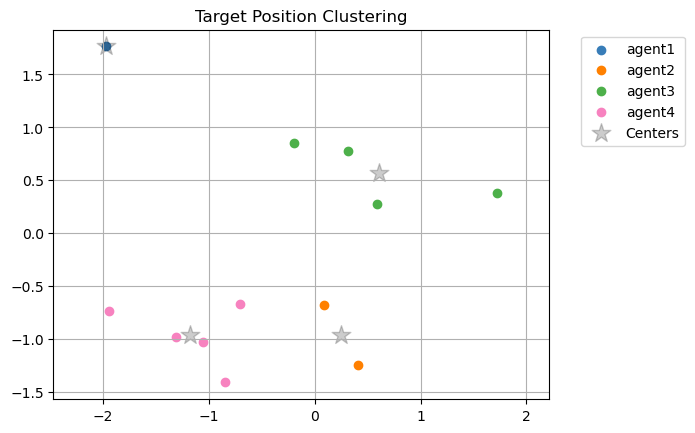

In [36]:
labels, centers = kmeans_clust(targets_pos)
clusters = zip_clusters(agents, targets, labels)
clusters_render(agents, clusters, centers)

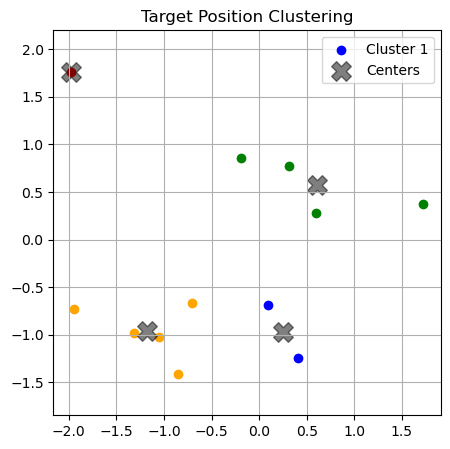

In [23]:
n_clusters = len(agents)

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(targets_pos)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

plt.figure(figsize=(5, 5))
for i, pos in enumerate(targets_pos):
    plt.scatter(pos[0], pos[1], color=colors[labels[i] % len(colors)], label=f"Cluster {labels[i]}" if i == 0 else "")

# 중심점
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', alpha=0.5, s=200, label='Centers')
plt.title("Target Position Clustering")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 타겟 개수 및 랜덤 데이터 생성
x_positions = [target.state.pos[0] for target in targets]
y_positions = [target.state.pos[1] for target in targets]
explore_time = [target.cost for target in targets]




# **📌 새로운 거리 메트릭 정의 (탐색 시간이 다르면 가까운 것처럼 계산)**
def custom_distance(v1, v2):
    x1, y1, t1 = v1
    x2, y2, t2 = v2
    space_distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)  # 유클리드 거리
    time_diff = t1 + t2  

    # **탐색 시간이 다를수록 거리 감소 → 더 쉽게 합쳐짐**
    time_weight = 0.04  # 탐색 시간 반영 정도 (낮을수록 탐색 시간 고려 ↑)
    adjusted_distance = space_distance + time_weight * time_diff  # 거리를 조정하여 다르면 더 가깝게

    return adjusted_distance

# 거리 행렬 계산
features = np.column_stack((x_positions, y_positions, explore_time))
distance_matrix = squareform(pdist(features, metric=custom_distance))

# Agglomerative Clustering 적용 (커스텀 거리 행렬 사용)
clustering = AgglomerativeClustering(n_clusters=4, metric='precomputed', linkage='complete')
labels = clustering.fit_predict(distance_matrix)


clusters = [[] for _ in range(4)]
for target, label in zip(targets, labels):
    clusters[label].append(target)
for goals in clusters:
    print(f"agent goals:")
    print(goals)

# 시각화
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, map_size)
ax.set_ylim(0, map_size)
plt.scatter(x_positions, y_positions, c=labels, cmap='viridis', s=100, edgecolors='k')
plt.title("Agglomerative Clustering (Custom Distance: Space + Explore Time)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

print(labels)

# 이 친구는 답이 없는걸....

IndexError: index 1 is out of bounds for dimension 0 with size 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


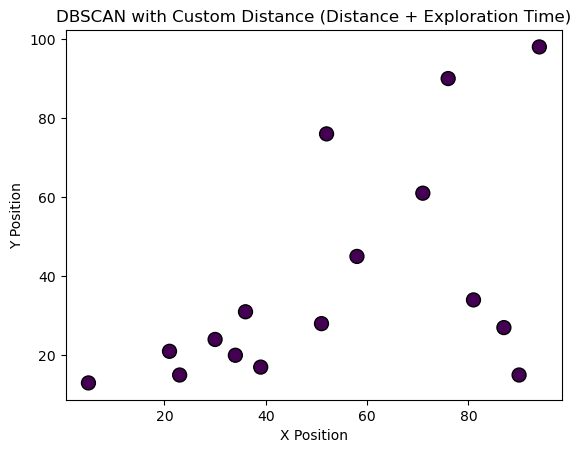

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np


# **📌 커스텀 거리 함수 (탐색 시간 반영)**
def custom_distance(v1, v2):
    x1, y1, t1 = v1
    x2, y2, t2 = v2
    space_distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)  # 유클리드 거리
    time_diff = abs(t1 + t2)  

    # 탐색 시간이 다를수록 거리 증가 → 밀도 기준 강화
    time_weight = 0.005  # 탐색 시간의 가중치 조정
    adjusted_distance = space_distance + time_weight * time_diff  

    return adjusted_distance

# **📌 거리 행렬 계산**
features = np.column_stack((x_positions, y_positions, explore_time))
distance_matrix = squareform(pdist(features, metric=custom_distance))

# **📌 DBSCAN 적용 (한 번만 실행)**
dbscan = DBSCAN(eps=np.percentile(distance_matrix, 40), min_samples=4, metric='precomputed')
labels = dbscan.fit_predict(distance_matrix)

print(labels)

# **📌 시각화**
plt.scatter(x_positions, y_positions, c=labels, cmap='viridis', s=100, edgecolors='k')
plt.title("DBSCAN with Custom Distance (Distance + Exploration Time)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

# 먹통이 되버렸는걸. 이해는 잘 안가지만 일단 패스할까요

agent goals:
[target_2: (tensor([87., 27.]), 300), target_3: (tensor([76., 90.]), 300), target_4: (tensor([34., 20.]), 300), target_5: (tensor([94., 98.]), 300)]
agent goals:
[target_0: (tensor([52., 76.]), 100), target_6: (tensor([ 5., 13.]), 100), target_7: (tensor([23., 15.]), 100), target_15: (tensor([30., 24.]), 100)]
agent goals:
[target_1: (tensor([51., 28.]), 200), target_8: (tensor([21., 21.]), 200), target_10: (tensor([39., 17.]), 200), target_11: (tensor([58., 45.]), 200)]
agent goals:
[target_9: (tensor([90., 15.]), 400), target_12: (tensor([81., 34.]), 400), target_13: (tensor([36., 31.]), 400), target_14: (tensor([71., 61.]), 400)]


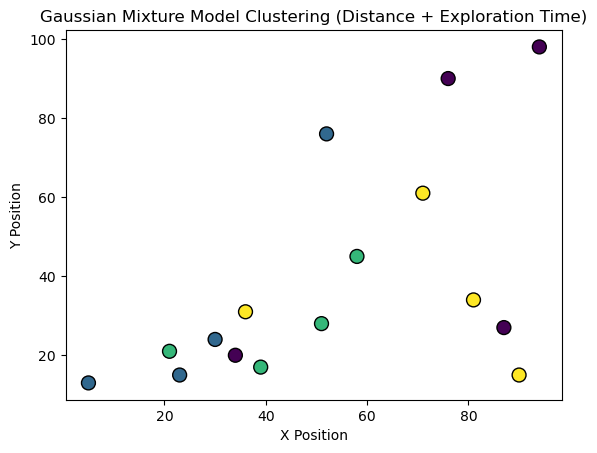

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비 (X, Y 위치 + 탐색 시간)
features = np.column_stack((x_positions, y_positions, explore_time))

# GMM 클러스터링 (클러스터 개수 지정)
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
labels = gmm.fit_predict(features)

clusters = [[] for _ in range(4)]
for target, label in zip(targets, labels):
    clusters[label].append(target)
for goals in clusters:
    print(f"agent goals:")
    print(goals)


# 시각화
plt.scatter(x_positions, y_positions, c=labels, cmap='viridis', s=100, edgecolors='k')
plt.title("Gaussian Mixture Model Clustering (Distance + Exploration Time)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()


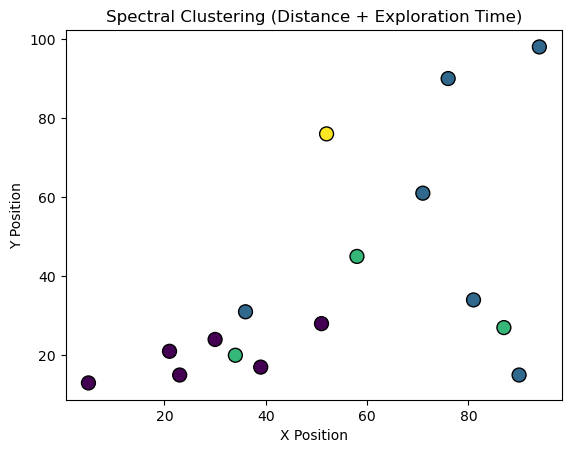

In [ ]:
from sklearn.cluster import SpectralClustering

# 유사도 행렬을 기반으로 클러스터링 수행
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
labels = sc.fit_predict(features)

# 시각화
plt.scatter(x_positions, y_positions, c=labels, cmap='viridis', s=100, edgecolors='k')
plt.title("Spectral Clustering (Distance + Exploration Time)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()


[0 1 2 2 2 2 0 0 1 3 1 1 3 3 3 0]


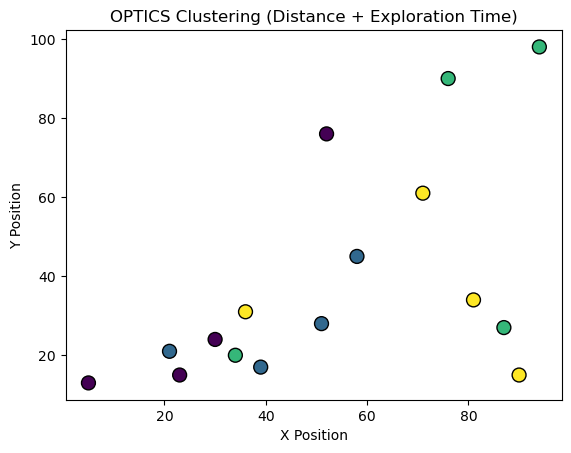

In [ ]:
from sklearn.cluster import OPTICS

# OPTICS 클러스터링
optics = OPTICS(min_samples=3, metric='minkowski', p=2)
labels = optics.fit_predict(features)

print(labels)

# 시각화
plt.scatter(x_positions, y_positions, c=labels, cmap='viridis', s=100, edgecolors='k')
plt.title("OPTICS Clustering (Distance + Exploration Time)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()
